### 1차 선형 회귀 모델 테스트(X : 판매단가, y : 취급액)
    - 시청률 데이터 미사용
    - 노출(분) imputation 안함
    - datetime, object variable 삭제
    - 12개월 전체 데이터를 0.25, 0.75 : test, train으로 학습한 결과 R2 0.943, MAPE 156

### 2차 비선형 회귀 모델 테스트(SVR : SVM Regression, X : 판매단가, y : 취급액)
    - 1차와 동일 조건으로 비선형 모델 사용
    - 모델 파라미터인 C등을 수정하면 모델 개선가능
    - 1차와 동일한 조건에서 비교 했을 때 , R2 0.86, MAPE 208 선형 모델을 사용하는것이 MAPE점수를 잘 받는데 도움 되는 듯.(워낙 많은 데이터의 기울기를 예측해야 해서 그런지 공부해봐야 할듯.))
    - https://m.blog.naver.com/PostView.nhn?blogId=jiehyunkim&logNo=220856198972&proxyReferer=https:%2F%2Fwww.google.com%2F -> 회귀모델의 평가 점수를 높이는데 도움되니 공부 필요.

### 3차로 필요한 것은 1차,2차에 미사용,삭제,보정하지 않은 데이터를 추가해야 될 것으로 보임.
    - 기본적으로 MAPE가 비선형 회귀모델을 사용하게 되면 208까지 나오는 것으로 확인.
    - 3차에 1,2차 미사용 조건들을 사용해서 선형, 비선형으로 재확인 필요
    - 문제 조건을 명확히 이해 파악해서 재 학습 결과 도출.

### 6월 test set, 나머지 train set(1,2차에 대한 결과) - StandardScaler사용 
    - MAPE 27.579 (linear, logistic), MAPE 415 (SVR)
    - MSE 0.014 (linear, logistic), MSE 415 (SVR)

In [1]:
import pandas as pd

In [142]:
performance_data = pd.read_excel('../2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/01_제공데이터/performance_data.xlsx',header = 1)
rating_data = pd.read_excel('../2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)/01_제공데이터/rating_data.xlsx',header = 1)

In [150]:
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
방송일시     38309 non-null datetime64[ns]
노출(분)    21525 non-null float64
마더코드     38309 non-null int64
상품코드     38309 non-null int64
상품명      38309 non-null object
상품군      38309 non-null object
판매단가     38309 non-null int64
취급액      37372 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [8]:
performance_data.head(3)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0


In [9]:
import requests

In [10]:
def get_request_query(url, operation, params, serviceKey):
    import urllib.parse as urlparse
    params = urlparse.urlencode(params)
    request_query = url + '/' + operation + '?' + params + '&' + 'serviceKey' + '=' + serviceKey
    return request_query

In [43]:
# 요청 URL과 오퍼레이션
URL = 'http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService'
OPERATION = 'getHoliDeInfo' # 국경일 + 공휴일 정보 조회 오퍼레이션

# 파라미터
SERVICEKEY = 'H2U3MYpA5cdO9eidjraO87W8mSVkIo77SNPtdNmNm31T33EFszX9mnbji8AFKCZka6jDsAHG%2BCga0yEkZCim%2Fw%3D%3D'
solYear  = '2019'  # 연도
solMonth = ''  # 월
PARAMS = {'solYear':solYear, 'solMonth':solMonth}


request_query = get_request_query(URL, OPERATION, PARAMS, SERVICEKEY)
# print('request_query:', request_query)
response = requests.get(url=request_query)
# print('status_code:' + str(response.status_code))


if True == response.ok:
    print(response.text)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><dateKind>01</dateKind><dateName>1월1일</dateName><isHoliday>Y</isHoliday><locdate>20190101</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>설날</dateName><isHoliday>Y</isHoliday><locdate>20190204</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>설날</dateName><isHoliday>Y</isHoliday><locdate>20190205</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>설날</dateName><isHoliday>Y</isHoliday><locdate>20190206</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>삼일절</dateName><isHoliday>Y</isHoliday><locdate>20190301</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>어린이날</dateName><isHoliday>Y</isHoliday><locdate>20190505</locdate><seq>1</seq></item><item><dateKind>01</dateKind><dateName>대체공휴일</dateName><isHoliday>Y</isHoliday><locdate>20190506</locda

# 6월 test set, 나머지 train set

### 6월 데이터 test set, 나머지 train set 구성

In [73]:
except_for_june = performance_data[performance_data['방송일시'].dt.month != 6]

In [188]:
train_of_june = performance_data[performance_data['방송일시'].dt.month != 1]

In [152]:
train_of_june.head(3)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0


In [190]:
test_of_june.head(3)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0


In [189]:
test_of_june = performance_data[performance_data['방송일시'].dt.month == 1]

# nan값 전부 삭제

In [191]:
test_of_june = (test_of_june.dropna()).reset_index(drop=True)
train_of_june = (train_of_june.dropna()).reset_index(drop=True)


In [74]:
except_for_june.head(3)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0


### nan값 있는 건 전부 날림

In [143]:
data_new = performance_data.dropna()

In [144]:
data_new.shape

(20588, 8)

## 방송일시, 상품명, 상품군 컬럼 삭제, 아직 학습 방향 안잡힘

In [192]:
test_of_june = test_of_june.drop(['방송일시','상품명', '상품군'], axis=1)
train_of_june = train_of_june.drop(['방송일시','상품명', '상품군'], axis=1)

In [145]:
data_new = data_new.reset_index(drop=True)

In [146]:
data_new.head(3)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
2,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [105]:
import matplotlib.pyplot as plt

# 정규화 하기

In [108]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [174]:
df_s = df

In [176]:
std_scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [178]:
df_s = std_scaler.transform(df_s)
df_s = pd.DataFrame(df_s, columns=df.columns, index=list(df.index.values))


# 데이터 분할

In [182]:
from sklearn.model_selection import train_test_split

# 모델 학습

In [183]:
X_train, X_test, y_train, y_test = train_test_split(df_s[['노출(분)','마더코드','상품코드','판매단가']], df_s[['취급액']])

In [101]:
from sklearn.linear_model import LinearRegression

In [193]:
print(std_scaler.fit(train_of_june))
train_data_standardScaled = std_scaler.transform(train_of_june)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [194]:
print(std_scaler.fit(test_of_june))
test_data_standardScaled = std_scaler.transform(test_of_june)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [195]:
train_data_standardScaled = pd.DataFrame(train_data_standardScaled, columns={'노출(분)','마더코드','상품코드','판매단가','취급액'})
test_data_standardScaled = pd.DataFrame(test_data_standardScaled, columns={'노출(분)','마더코드','상품코드','판매단가','취급액'})

In [196]:
x_test_june = test_data_standardScaled[['노출(분)','마더코드','상품코드','판매단가']]
y_test_june = test_data_standardScaled[['취급액']]
x_train_june = train_data_standardScaled[['노출(분)','마더코드','상품코드','판매단가']]
y_train_june = train_data_standardScaled[['취급액']]

In [184]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
y_predicted = line_fitter.predict(x_test_june)

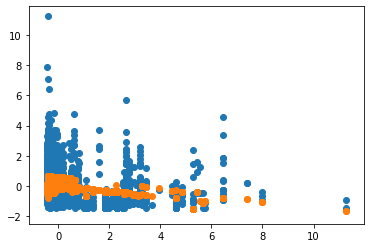

In [186]:
plt.scatter(X_test['판매단가'], y_test)
plt.scatter(X_test['판매단가'],y_predicted)

In [127]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [199]:
mean_absolute_percentage_error(y_test_june, y_predicted)

162.90390115141236

In [198]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_june, y_predicted)


1.5780418510233882

In [166]:
from sklearn.linear_model import LogisticRegression
model = LinearRegression()
model.fit(x_train_june, y_train_june)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_predicted2 = model.predict(x_test_june)

In [168]:
mean_absolute_percentage_error(y_test_june, y_predicted2)

27.57916980545152

In [169]:
mean_squared_error(y_test_june, y_predicted2)


0.01435342102167999

In [170]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x_train_june, y_train_june)     

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [171]:
svm_predicted = regr.predict(x_test_june)

In [172]:
mean_squared_error(y_test_june, svm_predicted)


0.018025233881292048

In [173]:
mean_absolute_percentage_error(y_test_june, svm_predicted)

415.2099404834633